In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

general_data = pd.read_csv("ENB2012.csv")
general_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
general_data.info()
general_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

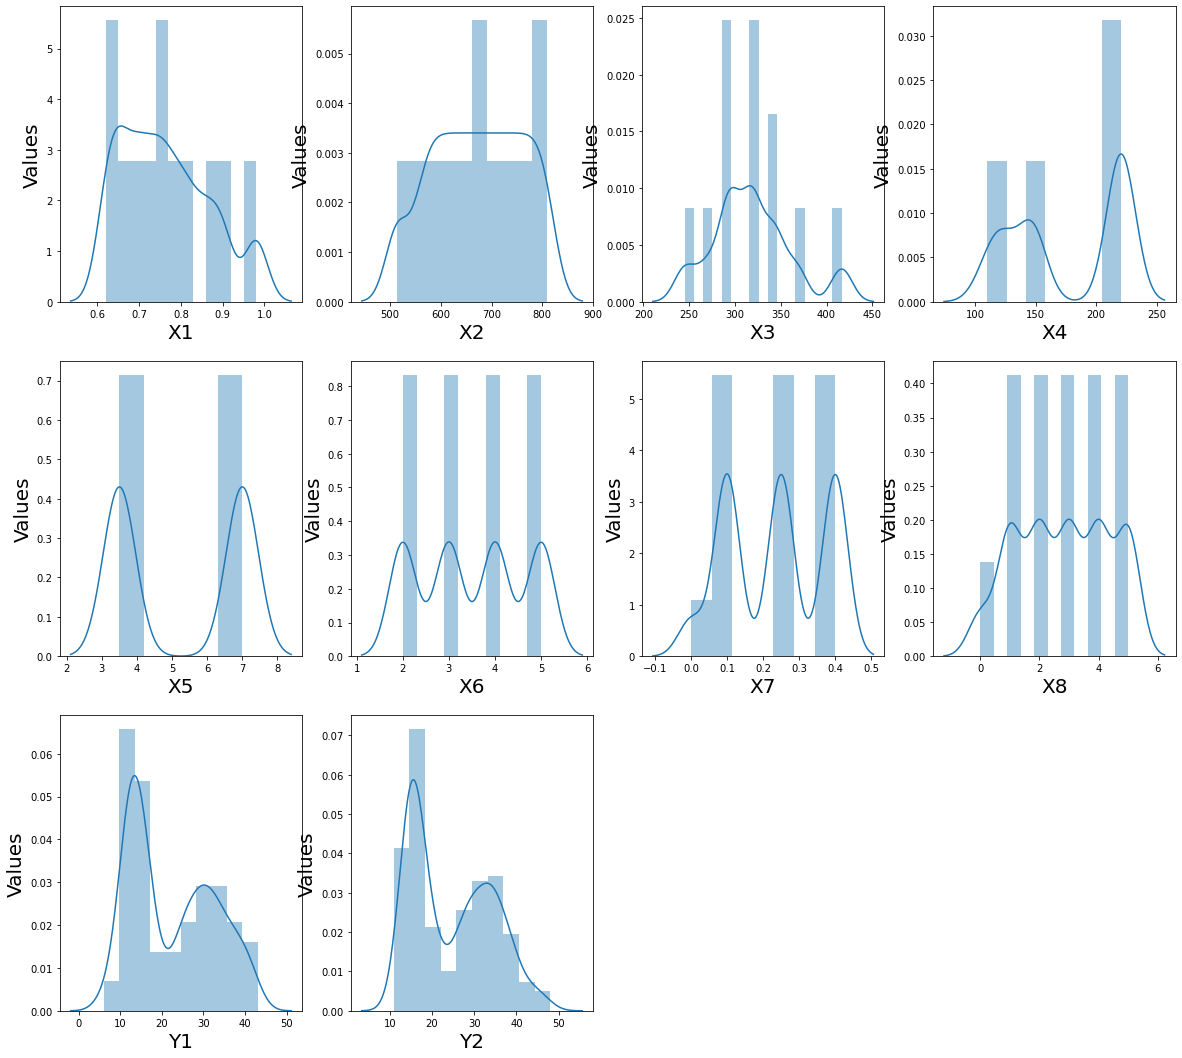

In [3]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in general_data:
  if plotnumber<11:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(general_data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Values',fontsize=20)
  plotnumber+=1
plt.show()

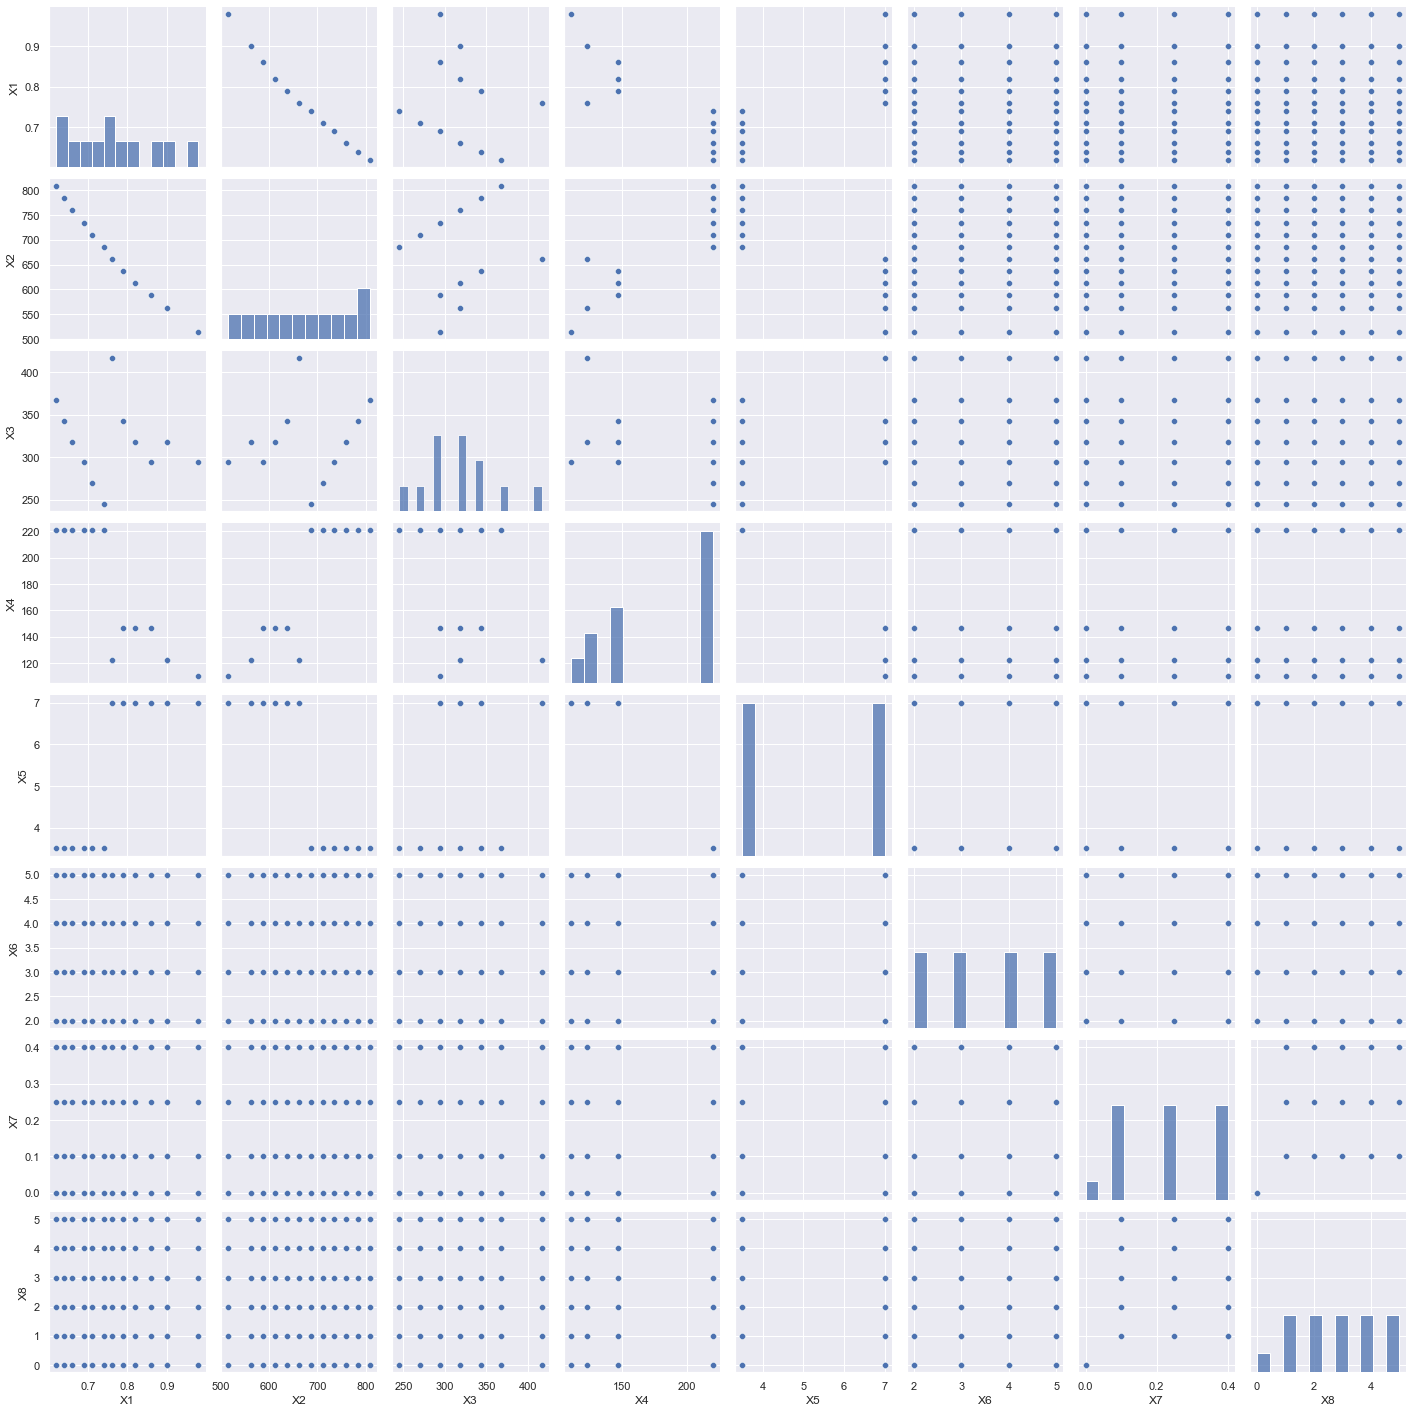

In [7]:
sns.set()
cols = ['X1', 'X2', 'X3', 'X4','X5','X6','X7','X8']
sns.pairplot(general_data[cols], height = 2.5)
plt.show();

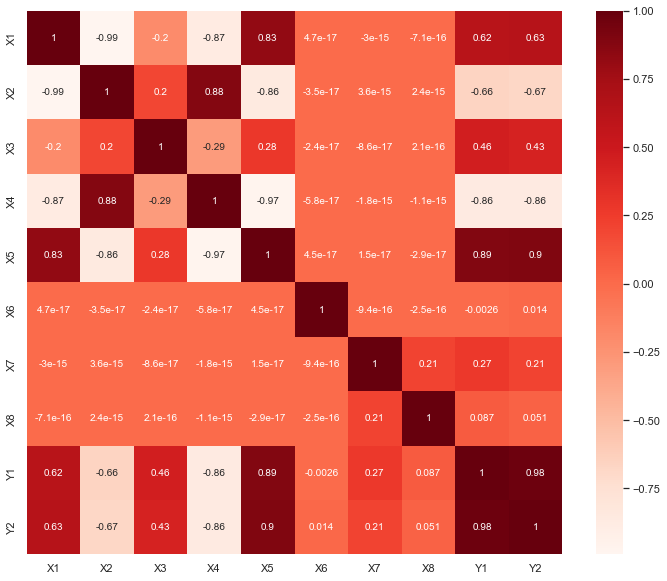

In [8]:
%matplotlib inline
plt.figure(figsize=(12,10))
cor = general_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
general_data.iloc[:, :-2]
general_data.iloc[:, [8,9]]

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [9]:
X = general_data.iloc[:, :-2].values
y = general_data.iloc[:, [8]].values.astype(int)

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_

#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression

#RFE_regressor = LinearRegression()
#rfe = RFE(RFE_regressor, 3)
#Transforming data using RFE
#X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
#RFE_regressor.fit(X,y)
#print(rfe.support_)
#print(rfe.ranking_)

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [10]:
general_data.iloc[:, :-5]

,X1,X2,X3,X4,X5
0,0.98,514.5,294.0,110.25,7.0
1,0.98,514.5,294.0,110.25,7.0
2,0.98,514.5,294.0,110.25,7.0
3,0.98,514.5,294.0,110.25,7.0
4,0.90,563.5,318.5,122.50,7.0
...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5
764,0.62,808.5,367.5,220.50,3.5
765,0.62,808.5,367.5,220.50,3.5
766,0.62,808.5,367.5,220.50,3.5


In [11]:
x = general_data.iloc[:, :-5].values
y = general_data.iloc[:, [8]].values.astype(int)


from sklearn.model_selection import KFold
kf=KFold(n_splits=10, shuffle=False)
print(kf)  
i=1       
for train_index, test_index in kf.split(x):
    print("Fold ", i)
    print("TRAIN :", train_index, "TEST :", test_index)
    x_train=x[train_index]
    x_test=x[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
    i+=1
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)


#from sklearn.model_selection import KFold

#kf = KFold(n_splits=10)
#kf.get_n_splits(X)

#for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 30

In [13]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['Logistic Regression']=acc*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Accuracy score of the model is: 14.473684210526317 %


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\dimas\py\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred)
accuracies['KNeighborsClassifier']=acc1*100

accuracy_score(y_train,knn.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Accuracy score of the model is: 0.0 %


D:\dimas\py\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [16]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVC']=acc2*100

accuracy_score(y_train,svc.predict(x_train))

print("Accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Accuracy score of the model is: 13.157894736842104 %


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
accuracies['DecisionTreeClassifier']=acc3*100

accuracy_score(y_train,dtc.predict(x_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Accuracy score of the model is: 5.263157894736842 %
